Чупров Максим

Лабораторная работа №4 по курсу "Цифровая обработка сигналов"

In [ ]:
import random
import numpy as np
from scipy import signal, fft

import matplotlib.pyplot as plt


%matplotlib inline

In [ ]:
random.seed(42)
np.random.seed(42)

In [ ]:
def draw_graphic(x: np.array, y: np.array, ax, title="", label="", xlabel="", ylabel="", xlim=None, ylim=None, grid=False, color=None):
    ax.plot(x, y, label=label, color=color)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    if not xlim is None:
        ax.set_xlim(xlim[0], xlim[1])
    if not ylim is None:
        ax.set_ylim(ylim[0], ylim[1]) 

    if grid:
        ax.grid()
    
    if len(label) > 0:
        ax.legend()

    return ax

# Task 1

Функция прямоугольного сигнала

In [ ]:
def f_rectangle(x, A=2, freq=0.5):
    return A * signal.square(x * 2 * np.pi * freq)


freq = 0.5
sample_rate = 100

x = np.arange(-10, 10, 1 / sample_rate)
y_sig = f_rectangle(x, freq=freq)
N = x.shape[0]

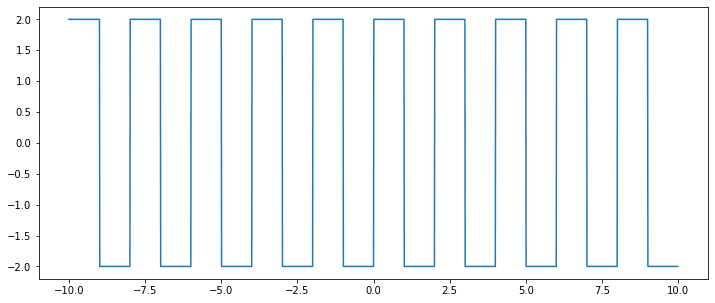

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(x, y_sig)
plt.show()

Создаем ядро свертки, заданное Гауссовой функцией

In [ ]:
def f_kernel_1(x, A=0.1):
    return A * np.exp(-x**2)

y_krnl_1 = f_kernel_1(x)

Создаем ядро свертки, заданное линейной функцией

In [ ]:
def f_kernel_2(x, A=1):
    y = -x + 1
    return np.where(((y > 1) | (y < 0)), 0, y)

y_krnl_2 = f_kernel_2(x)

Выводим графики двух ядер свертки

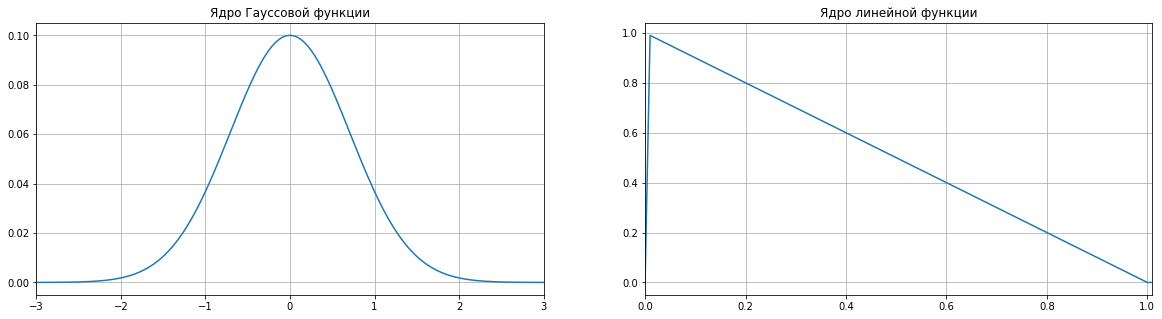

In [ ]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

draw_graphic(x, y_krnl_1, ax1, xlim=(-3, 3), grid=True, title="Ядро Гауссовой функции")
draw_graphic(x, y_krnl_2, ax2, xlim=(0, 1.01), grid=True, title="Ядро линейной функции")

plt.show()

Производим свертку по двум ядрам

In [ ]:
filtered_1 = np.convolve(y_sig, y_krnl_1, mode="same")
filtered_2 = np.convolve(y_sig, y_krnl_2, mode="same")

Выводим результаты сверток

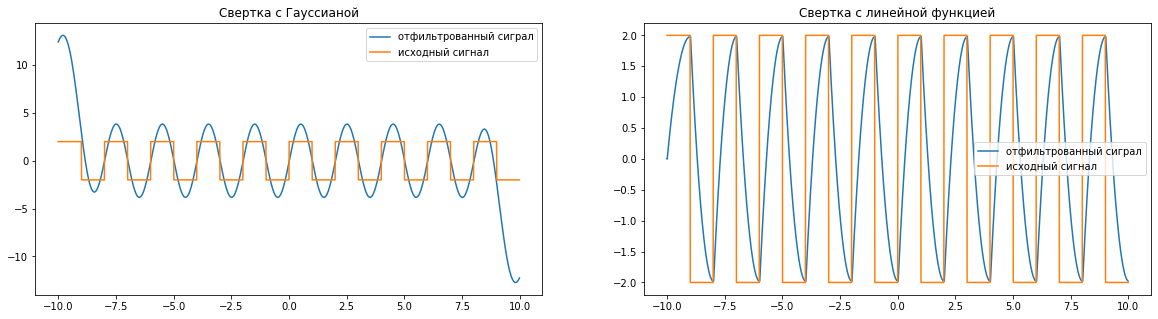

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

draw_graphic(x, filtered_1, ax1, label="отфильтрованный сиграл")
draw_graphic(x, y_sig, ax1, label="исходный сигнал", title="Свертка с Гауссианой")

draw_graphic(x, filtered_2 / 50, ax2, label="отфильтрованный сиграл")
draw_graphic(x, y_sig, ax2, label="исходный сигнал", title="Свертка с линейной функцией")

plt.show()

# Task 2

Убедимся, что свертка во временной области эквивалентна умножению в частотной области. Возьмем для этого два ядра из предыдущего задания

Находим спектр прямоугольного сигнала

In [ ]:
yf_sig = fft.rfft(y_sig)
yff_sig = np.abs(yf_sig)

xff = fft.rfftfreq(N, 1 / sample_rate)

Находим спектры ядер свертки

In [ ]:
yf_krnl_1 = fft.rfft(y_krnl_1)
yff_krnl_1 = np.abs(yf_krnl_1)

yf_krnl_2 = fft.rfft(y_krnl_2)
yff_krnl_2 = np.abs(yf_krnl_2)

Выводим графики спектров сигнала и ядер свертки

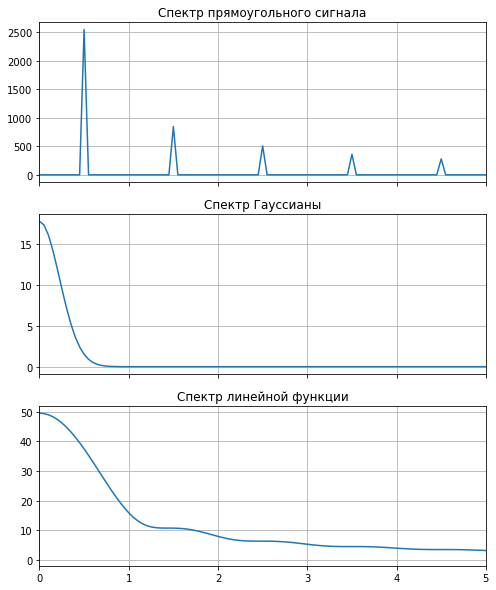

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 10), sharex=True)

draw_graphic(xff, yff_sig, ax1, xlim=(0, 5), grid=True, title="Спектр прямоугольного сигнала")
draw_graphic(xff, yff_krnl_1, ax2, xlim=(0, 5), grid=True, title="Спектр Гауссианы")
draw_graphic(xff, yff_krnl_2, ax3, xlim=(0, 5), grid=True, title="Спектр линейной функции")

plt.show()

Находим спектр отфильтрованного сигнала

In [ ]:
yf_filtered_1 = yf_sig * yf_krnl_1
yf_filtered_2 = yf_sig * yf_krnl_2

Выводим графики спектров отфильтрованного сигнала для разных ядер

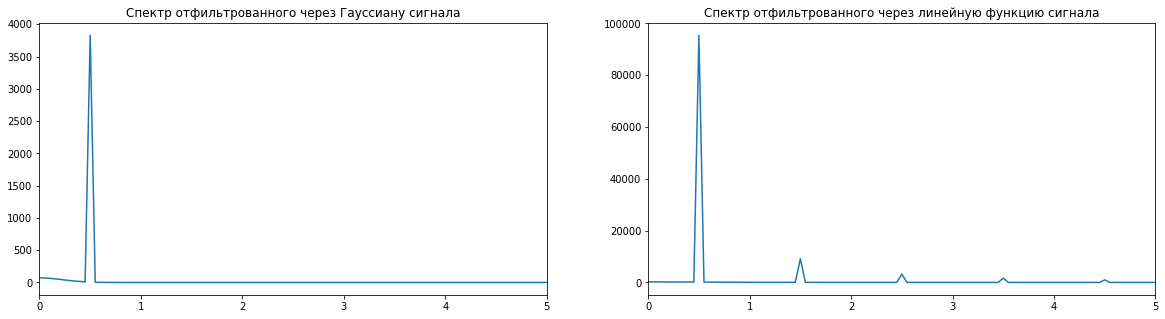

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

draw_graphic(xff, np.abs(yf_filtered_1), ax1, xlim=(0, 5), title="Спектр отфильтрованного через Гауссиану сигнала")
draw_graphic(xff, np.abs(yf_filtered_2), ax2, xlim=(0, 5), title="Спектр отфильтрованного через линейную функцию сигнала")

plt.show()

Находим отфильтрованные сигналы через обратное преобразование Фурье 

In [ ]:
filtered_freq_1 = fft.irfft(yf_filtered_1)
filtered_freq_2 = fft.irfft(yf_filtered_2)

Выводим графики отфильтрованных сигналов с разными ядрами, отфильтрованные через свертку с ядром и перемножением спектров

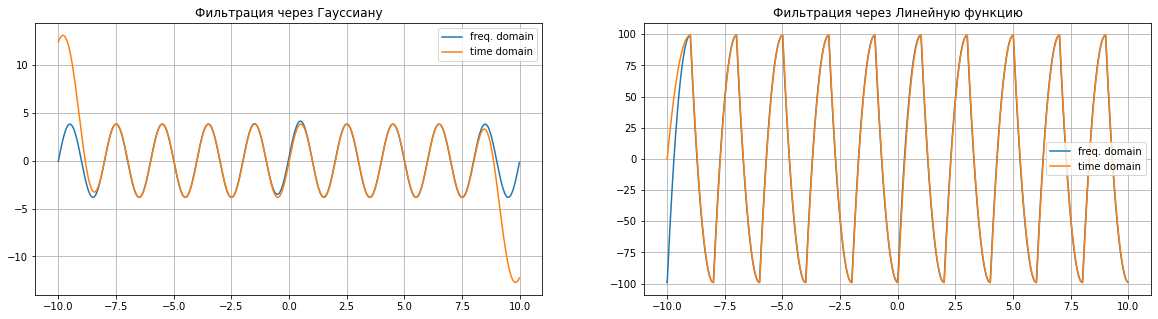

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

draw_graphic(x, filtered_freq_1, ax1, label="freq. domain", grid=True)
draw_graphic(x, filtered_1, ax1, label="time domain", title="Фильтрация через Гауссиану")
draw_graphic(x, filtered_freq_2, ax2, label="freq. domain", grid=True)
draw_graphic(x, filtered_2, ax2, label="time domain", title="Фильтрация через Линейную функцию")

plt.show()

# Task 4

Ядро Гаусса в частотной области

In [ ]:
def freq_gaussian_kernel(x, peak, width):
    s = width * (2 * np.pi - 1) / (4 * np.pi)
    return np.exp(-0.5 * ((x - peak) / s)**2)

Создаем узкополосный фильтр и фильтр низких частот

In [ ]:
gaussian_narrowband_filter = freq_gaussian_kernel(xff, 1, 0.1)
gaussian_lowpass_filter = freq_gaussian_kernel(xff, 0, 1)

Выводим графики узкополосного фильтра и фильтра низких частот

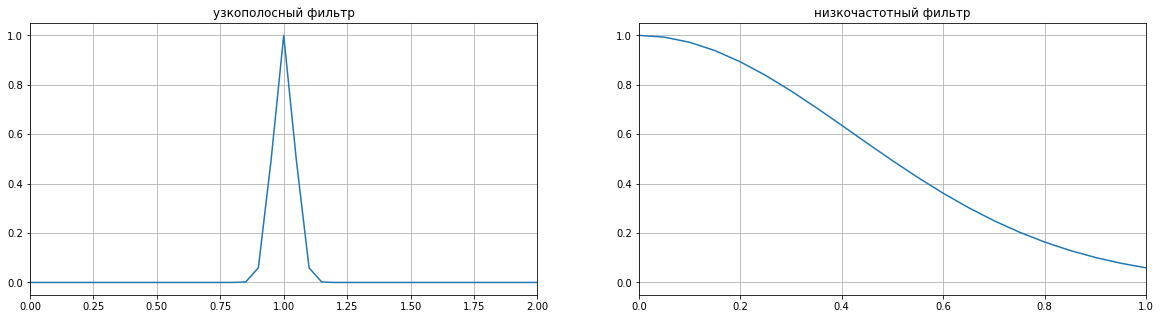

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

draw_graphic(xff, gaussian_narrowband_filter, ax1, title="узкополосный фильтр", grid=True, xlim=(0, 2))
draw_graphic(xff, gaussian_lowpass_filter, ax2, title="низкочастотный фильтр", grid=True, xlim=(0, 1))

plt.show()

Создаем исходный сигнал для последующей фильтрации

In [ ]:
np.random.seed(42)

p = 15
signal = np.interp(np.linspace(0, p, N), np.arange(0, p), np.random.rand(p) * 30)
noise = 5 * np.random.randn(N)
signal = signal + noise
signal -= signal.mean()

Выводим график полученного сигнала

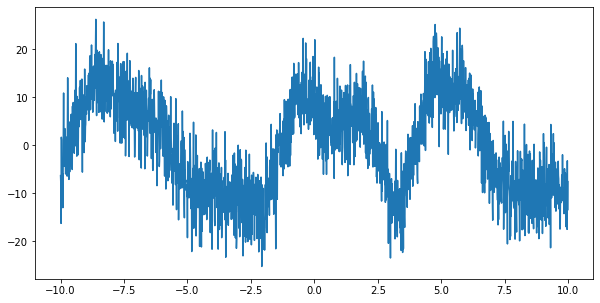

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(x, signal)
plt.show()

Находим спектр исходного сигнала

In [ ]:
f_signal = fft.rfft(signal)
ff_signal = np.abs(f_signal)

Находим спектры отфильтрованных с разными ядрами сигналов

In [ ]:
f_gaussian_narrowband_signal = f_signal * gaussian_narrowband_filter
f_gaussian_lowpass_signal = f_signal * gaussian_lowpass_filter

Выводим графики спектров исходного сигнала и после фильтрации

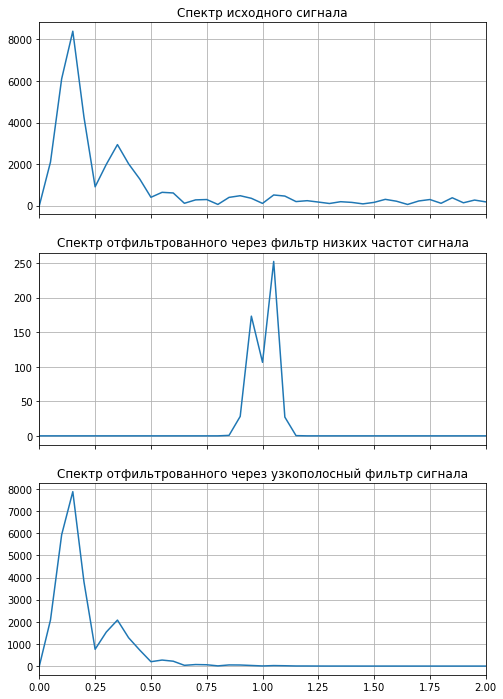

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

draw_graphic(xff, ff_signal, ax1, xlim=(0, 2), grid=True, title="Спектр исходного сигнала")
draw_graphic(xff, np.abs(f_gaussian_lowpass_signal), ax3, xlim=(0, 2), grid=True, title="Спектр отфильтрованного через узкополосный фильтр сигнала")
draw_graphic(xff, np.abs(f_gaussian_narrowband_signal), ax2, xlim=(0, 2), grid=True, title="Спектр отфильтрованного через фильтр низких частот сигнала")

plt.show()

Находим отфильтрованные сигналы через обратное преобразование Фурье 

In [ ]:
gaussian_narrowband_signal = fft.irfft(f_gaussian_narrowband_signal)
gaussian_lowpass_signal = fft.irfft(f_gaussian_lowpass_signal)

Выводим графики исходного и отфильтрованных сигналов

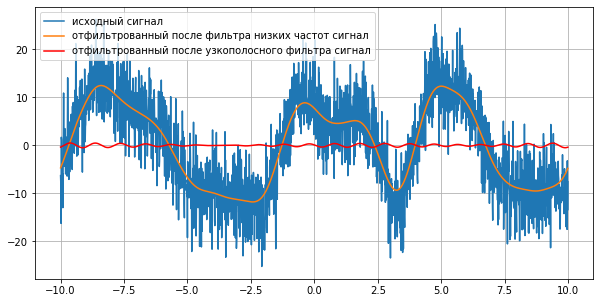

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))

draw_graphic(x, signal, ax1, grid=True, label="исходный сигнал")
draw_graphic(x, gaussian_lowpass_signal, ax1, grid=True, label="отфильтрованный после фильтра низких частот сигнал")
draw_graphic(x, gaussian_narrowband_signal, ax1, grid=True, label="отфильтрованный после узкополосного фильтра сигнал", color="r")

plt.show()

# Task 5

Функция окна Планка

In [ ]:
def freq_plank_filter(x: np.array, eps: float):
    def z_a(k, eps, n):
        return eps * (n - 1) * (1/k + 1/(k - eps * (n - 1)))

    def z_b(k, eps, n):
        return eps * (n - 1) * (1/(n - k - 1) + 1/((1 - eps) * (n - 1) - k))

    n = x.shape[0]
    indices = np.arange(n)

    filter = np.zeros(n)

    rise_cond = (0 < indices) & (indices < eps * (n - 1))
    filter = np.where(rise_cond, 1 / (np.exp(z_a(indices, eps, n)) + 1), filter)

    plato_cond = (eps * (n - 1) <= indices) & (indices <= (1 - eps) * (n - 1))
    filter = np.where(plato_cond, 1, filter)

    down_cond = ((1 - eps) * (n - 1) < indices) & (indices < n - 1)
    filter = np.where(down_cond, 1 / (np.exp(z_b(indices, eps, n)) + 1), filter)

    return filter

Создаем фильтр низких частот, образованный с помощью окна Планка 

In [ ]:
plank_filter = np.zeros_like(xff)
plank_filter[:14] = freq_plank_filter(xff[:14], 0.01)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


Выводим график полученного фильтра и график фильтра Гаусса для сравнения

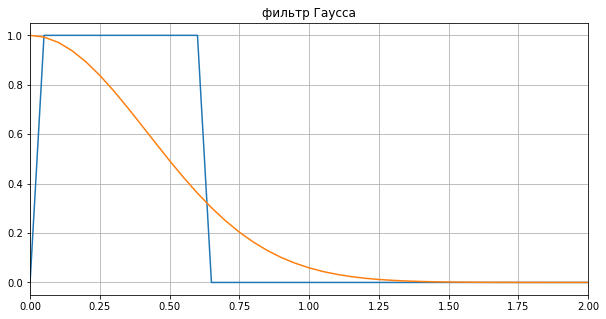

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))

draw_graphic(xff, plank_filter, ax1, title="фильтр Планка", xlim=(0, 2))
draw_graphic(xff, gaussian_lowpass_filter, ax1, title="фильтр Гаусса", grid=True, xlim=(0, 2))

plt.show()

Находим спектр отфильтрованного сигнала

In [ ]:
f_plank_lowpass_signal = f_signal * plank_filter

Выводим графики спектров исходного и отфильтрованного сигналов

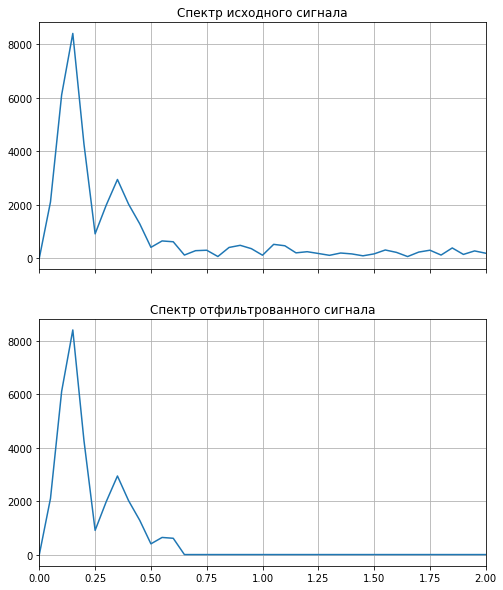

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10), sharex=True)

draw_graphic(xff, ff_signal, ax1, xlim=(0, 2), grid=True, title="Спектр исходного сигнала")
draw_graphic(xff, np.abs(f_plank_lowpass_signal), ax2, xlim=(0, 2), grid=True, title="Спектр отфильтрованного сигнала")

plt.show()

Находим исходный сигнал через обратное преобразование Фурье

In [ ]:
plank_lowpass_signal = fft.irfft(f_plank_lowpass_signal)

Выводим графики исходного сигнала и отфильтрованный сигналов через фильтры низких частот Планка и Гаусса 

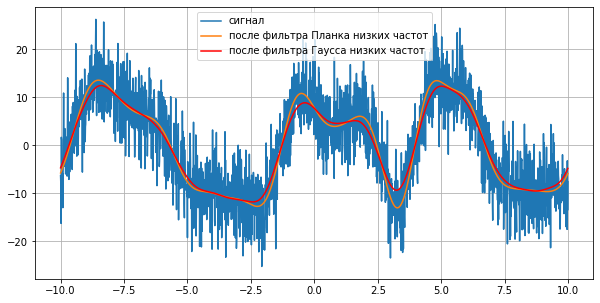

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))

draw_graphic(x, signal, ax1, grid=True, label="сигнал")
draw_graphic(x, plank_lowpass_signal, ax1, grid=True, label="после фильтра Планка низких частот")
draw_graphic(x, gaussian_lowpass_signal, ax1, grid=True, label="после фильтра Гаусса низких частот", color="r")

plt.show()